#### seaborn: statistical data visualization

![](https://seaborn.pydata.org/_static/logo-wide-lightbg.svg)

#### Sources and Contents to review
Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures. Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them.

#### Sources and Contents to review 
1. [Seaborn documentation](https://seaborn.pydata.org/index.html)
1. [User guide and tutorial](https://seaborn.pydata.org/tutorial.html)
1. [Learn Data Visualization Using Python Seaborn](https://medium.com/edureka/python-seaborn-tutorial-646fdddff322)
1. [Tutorialspoint seaborn](https://www.tutorialspoint.com/seaborn/index.htm)
1. [Seaborn Tutorial](https://www.youtube.com/watch?v=6GUZXDef2U0)
1. [Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)

#### **Tutorial**


Official releases of seaborn can be installed from PyPI using pip or can installed usning conda:

In [ ]:
# !pip install seaborn
# or
# !conda install seaborn

Import required library to start:

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
First few examples:

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


matplotlib.axes._subplots.AxesSubplot

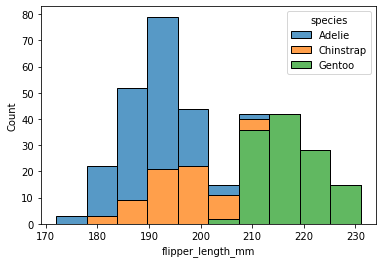

In [12]:
penguins = sns.load_dataset("penguins")
print(penguins.head())
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

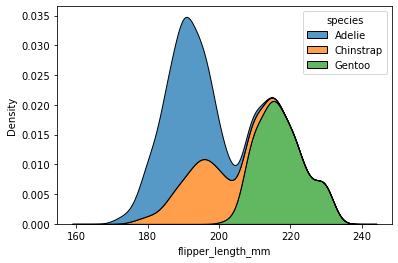

In [14]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

#### **Figure-level vs. axes-level functions**

there is a cross-cutting classification of seaborn functions as “axes-level” or “figure-level”. The examples above are axes-level functions. They plot data onto a single matplotlib.pyplot.Axes object, which is the return value of the function. In contrast, figure-level functions interface with matplotlib through a seaborn object, usually a FacetGrid, that manages the figure. Each module has a single figure-level function, which offers a unitary interface to its various axes-level functions. The organization looks a bit like this:

![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

For example, displot() is the figure-level function for the distributions module. Its default behavior is to draw a histogram, using the same code as histplot() behind the scenes:

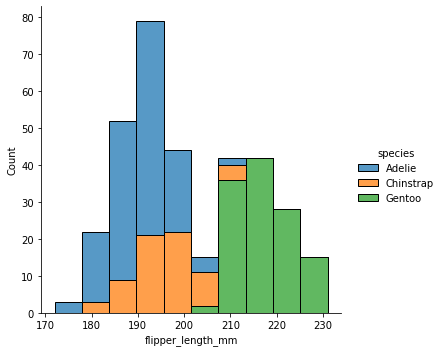

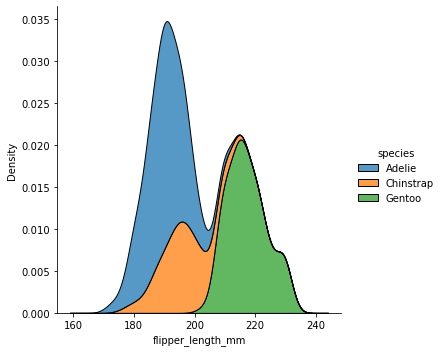

In [11]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde")

#### **Axes-level functions make self-contained plots**

The axes-level functions are written to act like drop-in replacements for matplotlib functions. While they add axis labels and legends automatically, they don’t modify anything beyond the axes that they are drawn into. That means they can be composed into arbitrarily-complex matplotlib figures with predictable results.

The axes-level functions call matplotlib.pyplot.gca() internally, which hooks into the matplotlib state-machine interface so that they draw their plots on the “currently-active” axes. But they additionally accept an ax= argument, which integrates with the object-oriented interface and lets you specify exactly where each plot should go:

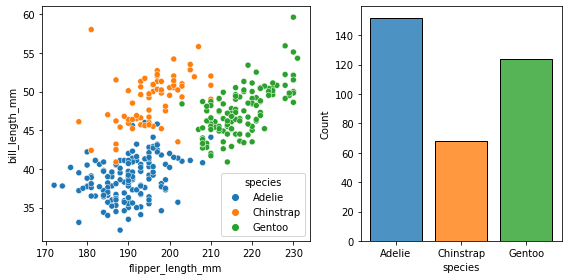

In [15]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

#### **Figure-level functions own their figure**
In contrast, figure-level functions cannot (easily) be composed with other plots. By design, they “own” their own figure, including its initialization, so there’s no notion of using a figure-level function to draw a plot onto an existing axes. This constraint allows the figure-level functions to implement features such as putting the legend outside of the plot.

Nevertheless, it is possible to go beyond what the figure-level functions offer by accessing the matplotlib axes on the object that they return and adding other elements to the plot that way:

AttributeError: 'AxesSubplot' object has no attribute 'axline'

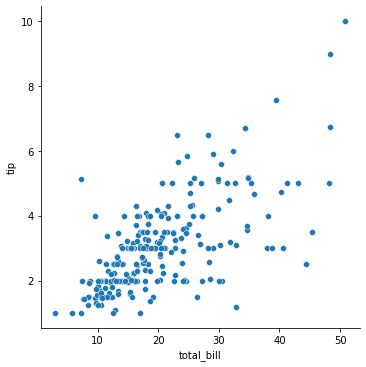

In [22]:
tips = sns.load_dataset("tips")
g = sns.relplot(data=tips, x="total_bill", y="tip")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))

There is a cross-cutting classification of seaborn functions as “axes-level” or “figure-level”. The examples above are axes-level functions. They plot data onto a single matplotlib.pyplot.Axes object, which is the return value of the function.

In contrast, figure-level functions interface with matplotlib through a seaborn object, usually a FacetGrid, that manages the figure. Each module has a single figure-level function, which offers a unitary interface to its various axes-level functions. The organization looks a bit like this: